In [1]:
#library(dplyr)
library(Seurat)
#library(patchwork)

Attaching SeuratObject



Import data from https://osf.io/924fz/. 

In [2]:
#ovary_0.rds
pbmc <- readRDS("data/ovary_0.rds")

In [3]:
pbmc


An object of class Seurat 
23657 features across 34712 samples within 1 assay 
Active assay: RNA (23657 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

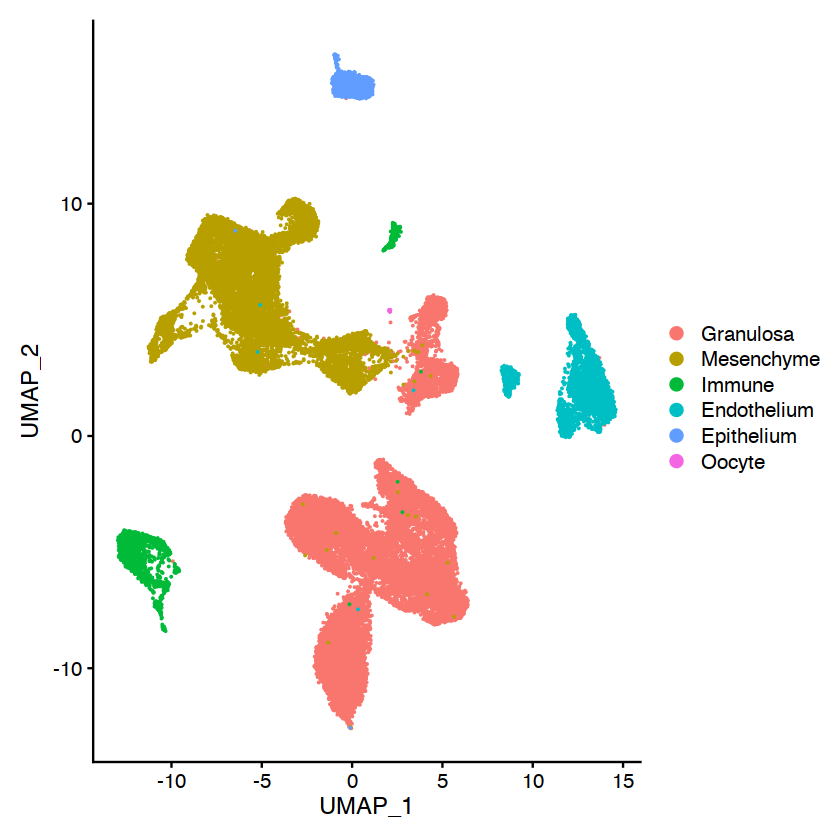

In [4]:
DimPlot(pbmc, reduction = "umap" ,raster=FALSE)

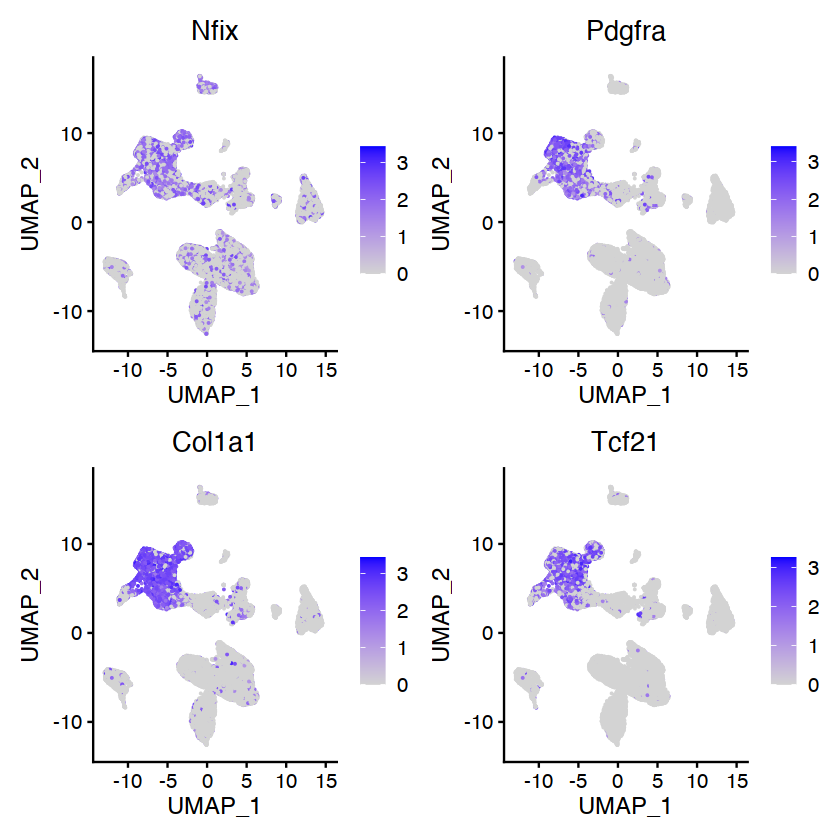

In [5]:
#Mesenchymal
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Tcf21"),raster=FALSE)

In [6]:
colnames(pbmc[[]])

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"

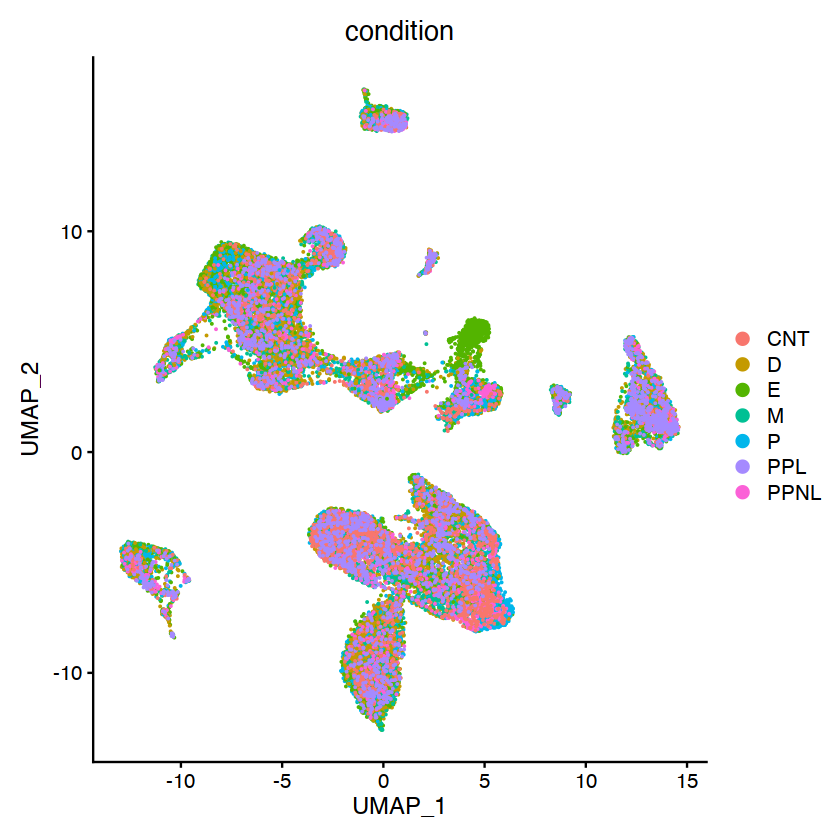

In [7]:
DimPlot(pbmc, reduction = "umap", group.by = "condition",raster=FALSE)

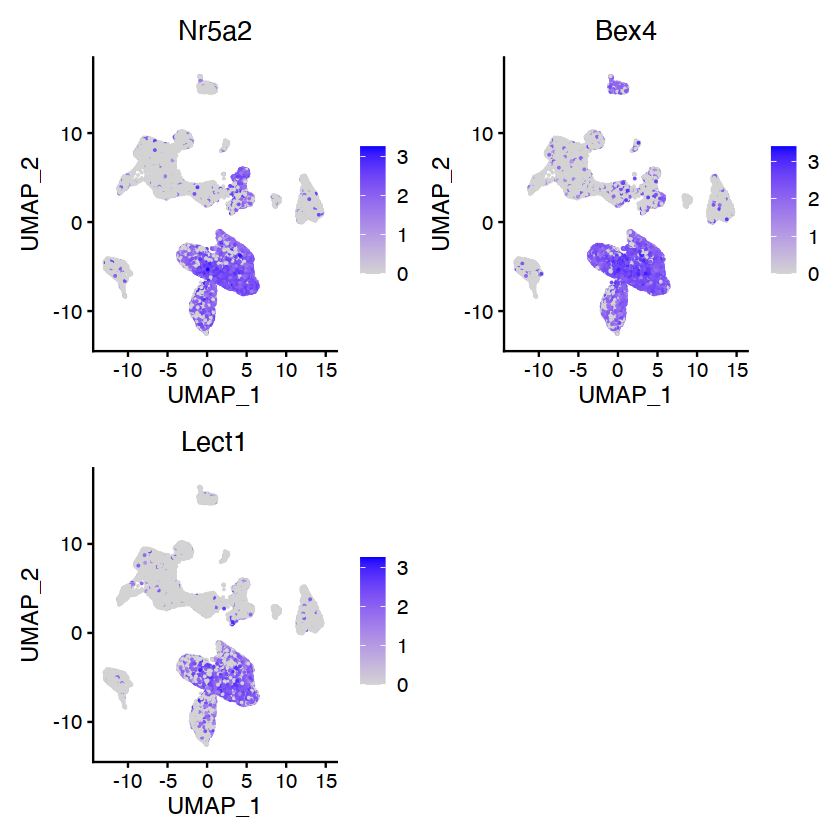

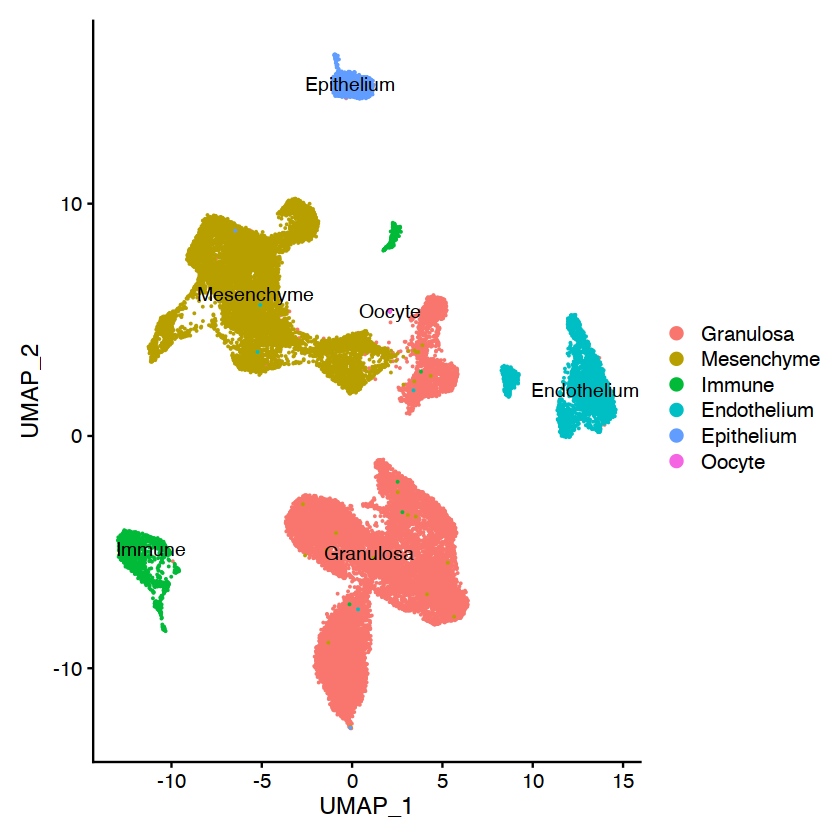

In [7]:
#Granulosa
FeaturePlot(pbmc, features = c("Nr5a2","Bex4","Lect1"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

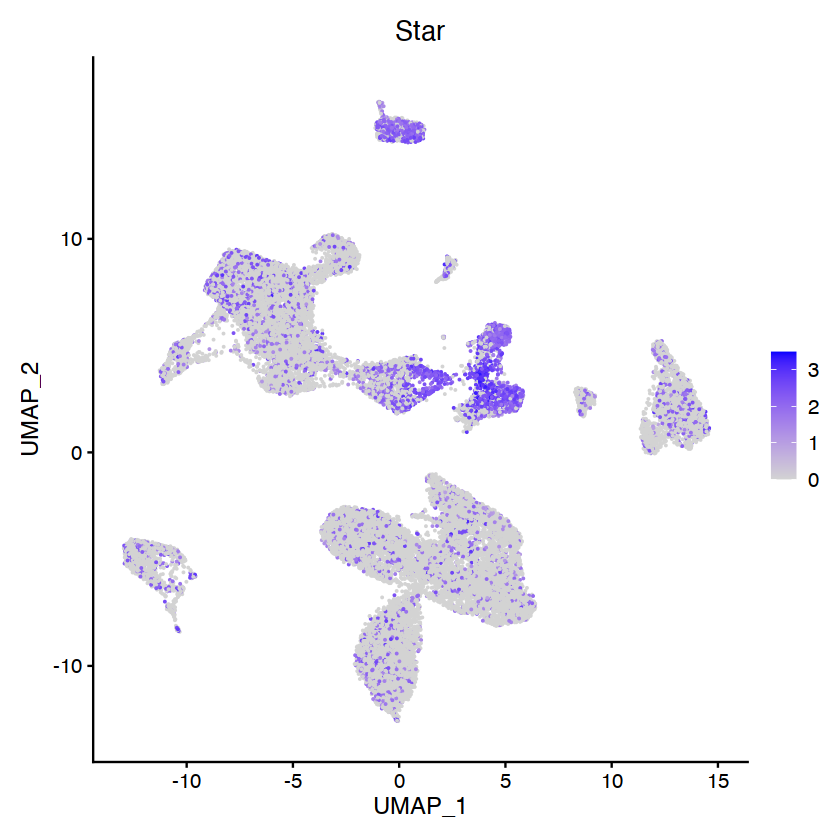

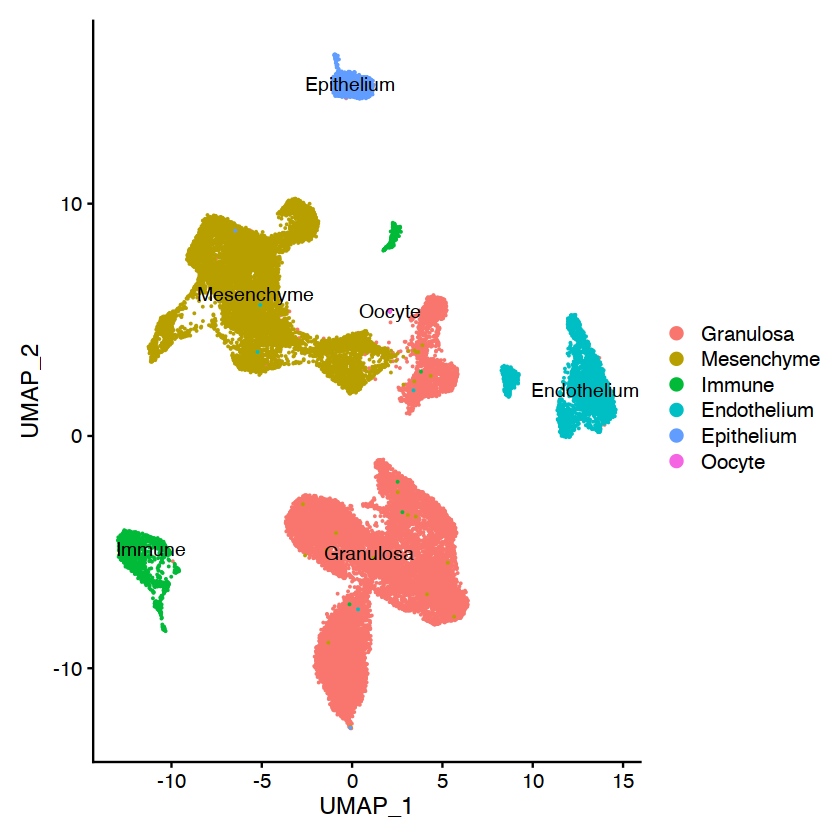

In [8]:
FeaturePlot(pbmc, features = c("Star"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [9]:
library(ggplot2)
library(dittoSeq)

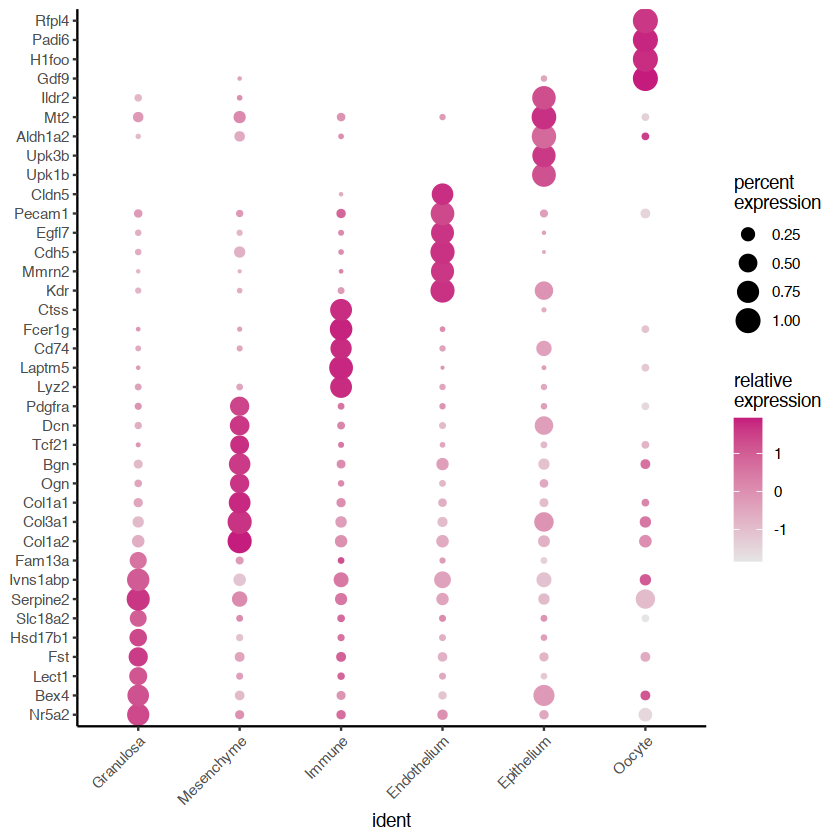

In [10]:
your_markers <- c('Nr5a2','Bex4','Lect1','Fst','Hsd17b1','Slc18a2','Serpine2','Ivns1abp','Fam13a',
                  'Col1a2','Col3a1','Col1a1','Ogn','Bgn','Tcf21','Dcn','Pdgfra',
                  'Lyz2','Laptm5','Cd74','Fcer1g','Ctss',
                  'Kdr','Mmrn2','Cdh5','Egfl7','Pecam1','Cldn5',
                  'Upk1b','Upk3b',"Aldh1a2",'Mt2','Ildr2',
                  'Gdf9','H1foo',"Padi6",'Rfpl4'
                  
                  
                 )
dittoDotPlot(pbmc, your_markers, group.by = "ident") + coord_flip()

In [11]:
granulosa =  subset(x = pbmc, idents = "Granulosa")

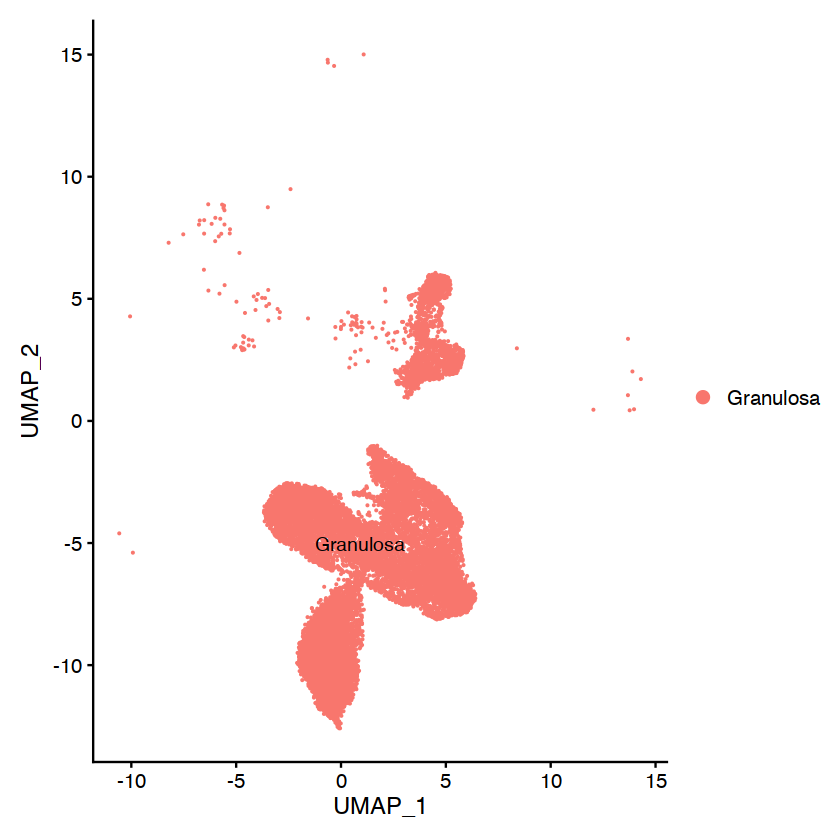

In [12]:
DimPlot(granulosa, reduction = "umap", label =TRUE)

Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 991 features requested have not been scaled (running reduction without them): Sowahd, Gm16104, Slc25a2, Olfr734, Gm5092, Ube4bos3, Gm10322, S1pr4, Gm15658, Tdpoz1, Gip, Gm9507, Gm42532, Gm11579, Mrgpra4, X4921511C10Rik, X9230104L09Rik, Olfr139, Pinlyp, X4933406G16Rik, Mfsd4b1, X1700025M24Rik, Gm42980, Gm13546, Oas1a, Gap43, Vmn1r90, Gm13261, X1810010K12Rik, Olfr1178, Gm26684, X4933430L12Rik, X2310002L09Rik, Olfr1018, Qrich2, BB014433, Olfr1234, Olfr1145, Tas2r105, Syce1l, Cfap206, Gm15655, Tbx4, Opn5, Il1f10, X4930405L22Rik, Tex12, Gm13982, X4933426K07Rik, Gm9994, X1700129L04Rik, Bcas1os2, X4930448A20Rik, Sprr2a3, Cldn34b3, Olfr1107, Krtap6.2, Platr20, Ifnk, Olfr767, Gm5114, Krtap19.3, Gm454, Vmn1r14, Srms, X1700036G14Rik, Gm16599, Gml2, Pcdhb2, Gm13759, X6030471H07Rik, Psg18, Olfr832, Olfr935, Gm17728, Ighv14.2, Gm12746, Rhox13, Gm12159, Ugt2b38, Tmem30

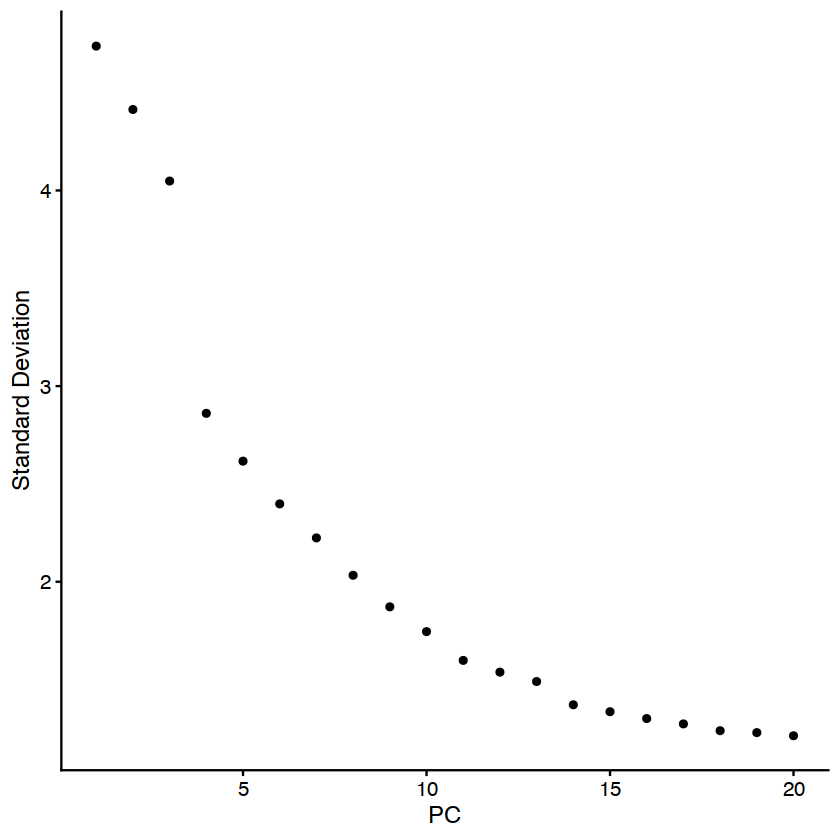

In [13]:
granulosa <- NormalizeData(granulosa, normalization.method = "LogNormalize", scale.factor = 10000)
granulosa <- ScaleData(granulosa)
granulosa <- FindVariableFeatures(granulosa, selection.method = "vst", nfeatures = 2000)
granulosa <- RunPCA(granulosa, features = VariableFeatures(object = granulosa))
ElbowPlot(granulosa)

In [14]:
granulosa <- FindNeighbors(granulosa, dims = c(1:20))
granulosa <- FindClusters(granulosa, resolution = 0.3)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17627
Number of edges: 628776

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9169
Number of communities: 7
Elapsed time: 3 seconds


In [15]:
# min.dist = 0.1
granulosa <- RunUMAP(granulosa, reduction = "pca", dims = c(1:20), 
  spread = 1, min.dist = 0.2)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:53:21 UMAP embedding parameters a = 1.262 b = 1.003

13:53:21 Read 17627 rows and found 20 numeric columns

13:53:21 Using Annoy for neighbor search, n_neighbors = 30

13:53:21 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:53:23 Writing NN index file to temp file /var/folders/9q/bcmy70lj3f7_0km479f7zckh0000gp/T//Rtmp50Fobb/file6eb5e6f9705

13:53:23 Searching Annoy index using 1 thread, search_k = 3000

13:53:28 Annoy recall = 100%

13:53:28 Commencing smooth kNN distance calibrati

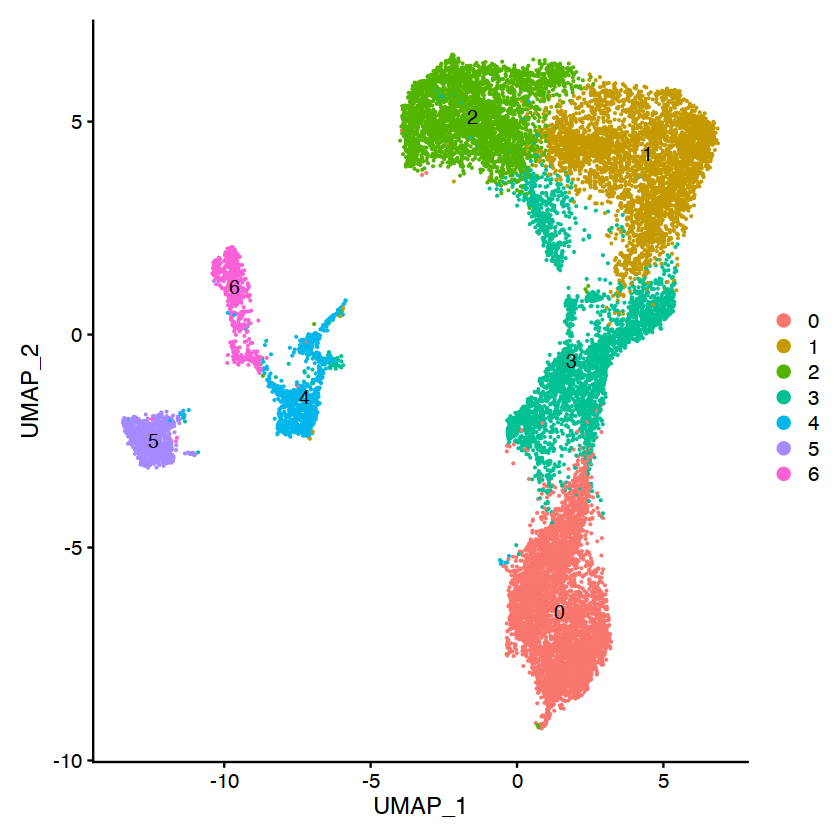

In [16]:
DimPlot(granulosa, reduction = "umap", label =TRUE,raster=FALSE)

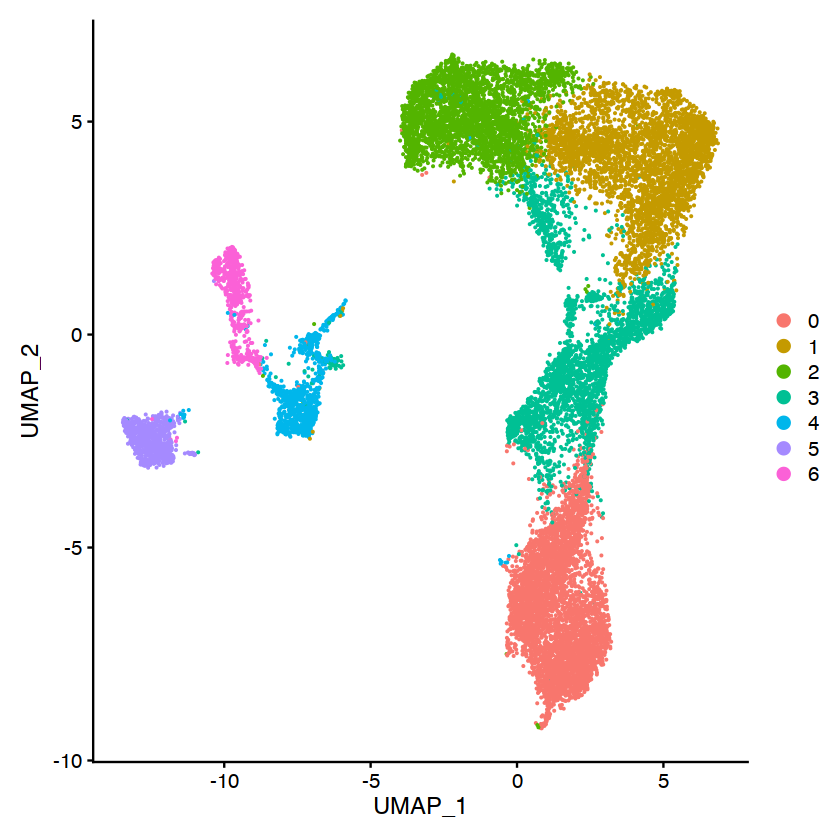

In [17]:
DimPlot(granulosa, reduction = "umap",raster=FALSE)

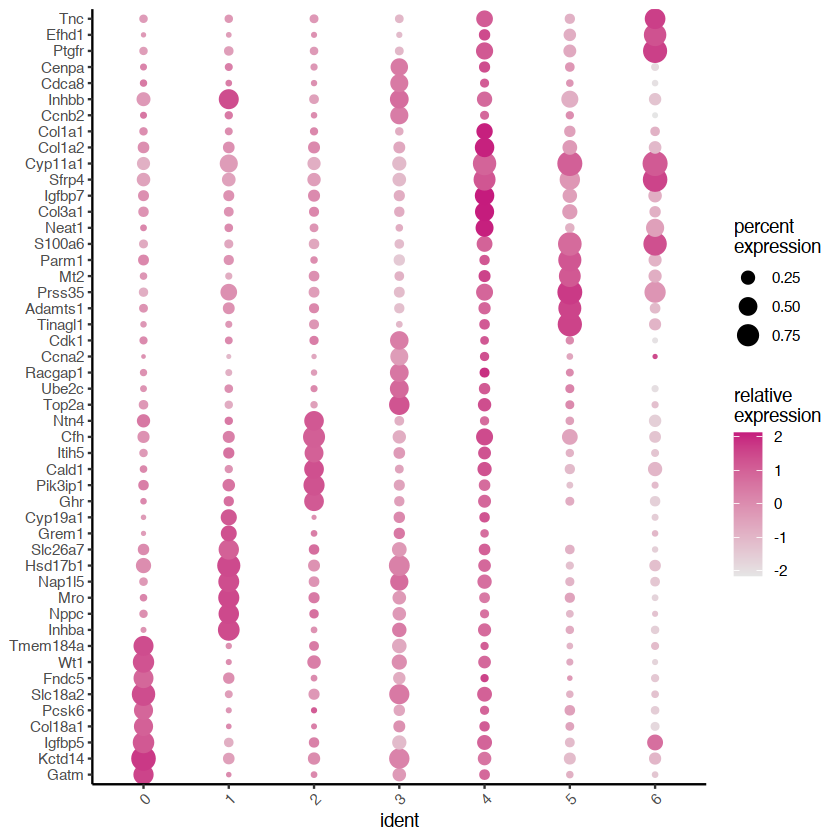

In [18]:
your_markers <- c('Gatm','Kctd14','Igfbp5','Col18a1','Pcsk6','Slc18a2','Fndc5','Wt1','Tmem184a',
                  'Inhba','Nppc','Mro','Nap1l5','Hsd17b1','Slc26a7','Grem1','Cyp19a1',
                  'Ghr','Pik3ip1','Cald1','Itih5','Cfh','Ntn4',
                  'Top2a','Ube2c','Racgap1','Ccna2','Cdk1',
                  'Tinagl1','Adamts1',"Prss35",'Mt2','Parm1','S100a6',
                  'Neat1','Col3a1',"Igfbp7",'Sfrp4','Cyp11a1','Col1a2','Col1a1',
                  'Ccnb2',"Inhbb","Cdca8","Cenpa",
                  'Ptgfr',"Efhd1","Tnc"
                  
                 )
dittoDotPlot(granulosa, your_markers, group.by = "ident") + coord_flip()

In [19]:
granulosa[["Louvain"]] <- Idents(object = granulosa)

In [20]:
granulosa <- RenameIdents(granulosa, '0' = 'Preantral', '1' = 'Antral',
                                               '2' = 'Atretic','3'='Mitotic',
                                               '4'='Granulosa lutein','5' = 'Granulosa Estrous',
                                               '6' = 'Granulosa lutein lytic'
                          )

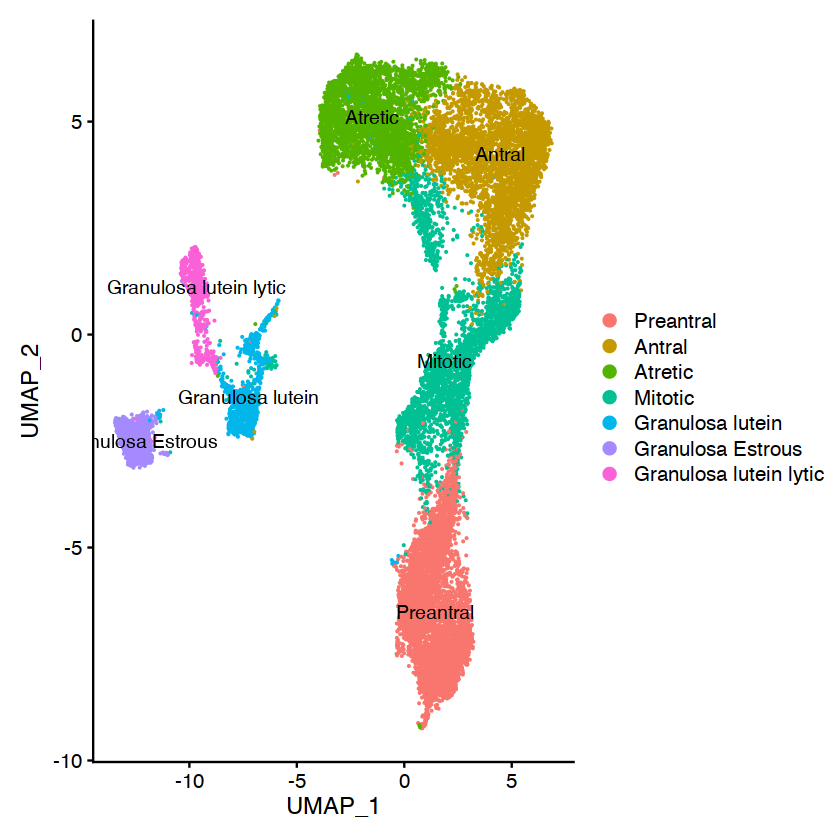

In [21]:
DimPlot(granulosa, reduction = "umap",  label =TRUE,raster=FALSE)

In [22]:
save(granulosa, file="data/morris-granulosa.Rdata")

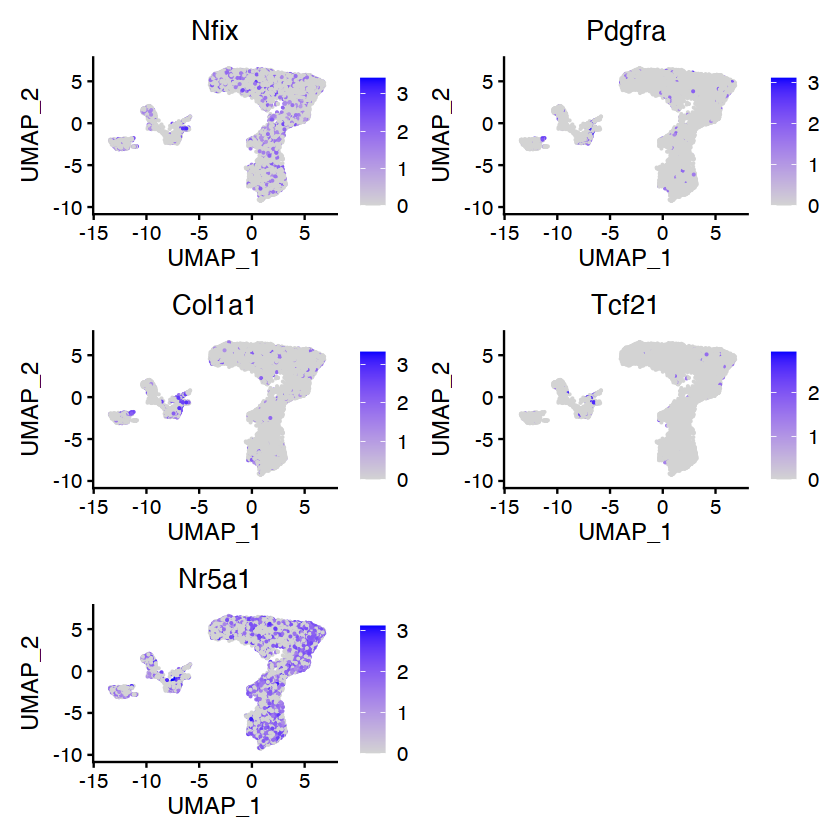

In [23]:
FeaturePlot(granulosa, features = c("Nfix","Pdgfra","Col1a1","Tcf21","Nr5a1"),raster=FALSE)

In [24]:
mesenchyme =  subset(x = pbmc, idents = "Mesenchyme")

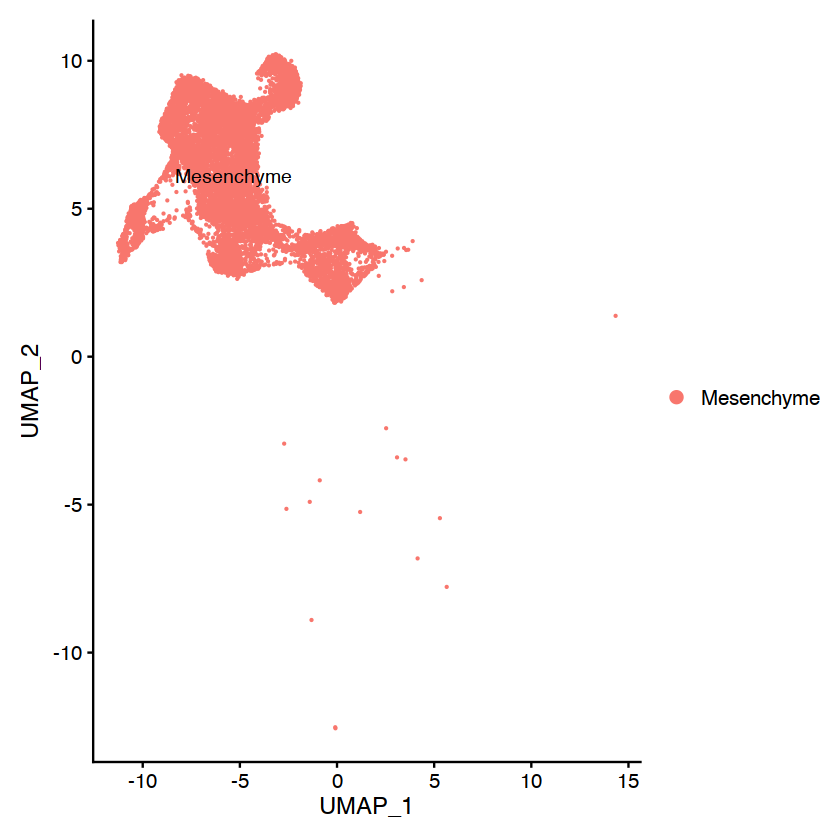

In [25]:
DimPlot(mesenchyme, reduction = "umap", label =TRUE)

In [26]:
mesenchyme <- NormalizeData(mesenchyme, normalization.method = "LogNormalize", scale.factor = 10000)

In [27]:
mesenchyme <- ScaleData(mesenchyme)

Centering and scaling data matrix



Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 1179 features requested have not been scaled (running reduction without them): Inmt, Gm3510, Pln, Krtap27.1, Klk1b11, Gm13985, Frmpd1os, Olfr822, Hist1h2ak, Cd164l2, Olfr195, T, X9630013K17Rik, Gabrr1, A330043C09Rik, Gm16294, Krtap24.1, Chrna3, Krt6a, Ccdc172, Daw1, Rhox9, Cyp2j5, D330020A13Rik, X4930413E15Rik, Gm38182, Gm36831, Gm10564, Gm16015, Olfr552, Tas2r119, Gm20109, X6430710C18Rik, Ssmem1, Cmtm2b, BC051537, Gm27153, A330094K24Rik, Krt39, Pebp4, X1700061I17Rik, Olfr1128, Gm3455, Gm12227, Ccin, Gm4035, Tbc1d22bos, Gm14164, Olfr1066, Amh, X1700039E15Rik, X4930593A02Rik, Tmco2, Dynap, Spink8, Mug.ps1, Mrgprx1, Vmn1r208, Hyal5, Defb45, Guca2a, Gm43277, Slc25a31, Nt5c1b, Gm17094, X9530052C20Rik, Acnat2, Mrgprb4, Cyp2j12, Cxcl5, Gm29609, X4930505M18Rik, Ahsg, Olfr214, Spo11, Olfr1184, Vmn1r84, Vmn1r230, Mroh3, Rims2, Gm15734, Tex19.1, Cyp8b1, X2610028E06Rik, Gm5868, Cct6b, Dydc2, Olfr685

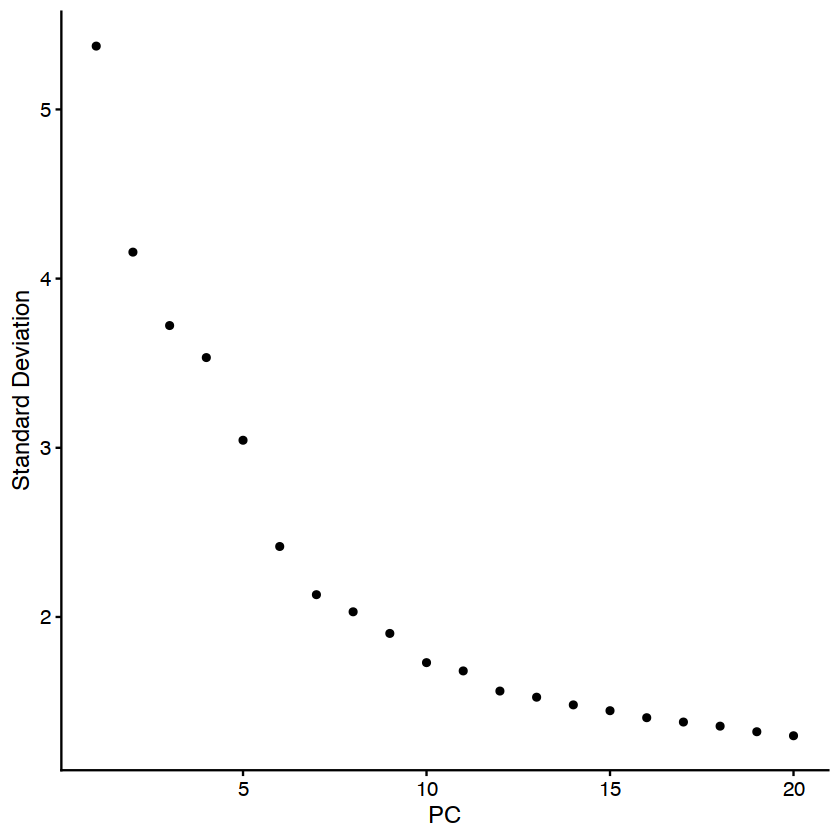

In [28]:
mesenchyme <- FindVariableFeatures(mesenchyme, selection.method = "vst", nfeatures = 2000)
mesenchyme <- RunPCA(mesenchyme, features = VariableFeatures(object = mesenchyme))
ElbowPlot(mesenchyme)

In [29]:
mesenchyme <- FindNeighbors(mesenchyme, dims = c(1:20))
mesenchyme <- FindClusters(mesenchyme, resolution = 0.3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10825
Number of edges: 389425

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9084
Number of communities: 7
Elapsed time: 1 seconds


In [30]:
# min.dist = 0.1
mesenchyme <- RunUMAP(mesenchyme, reduction = "pca", dims = c(1:20), 
  spread = 1, min.dist = 0.2)

13:55:46 UMAP embedding parameters a = 1.262 b = 1.003

13:55:46 Read 10825 rows and found 20 numeric columns

13:55:46 Using Annoy for neighbor search, n_neighbors = 30

13:55:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:55:48 Writing NN index file to temp file /var/folders/9q/bcmy70lj3f7_0km479f7zckh0000gp/T//Rtmp50Fobb/file6eb249bf871

13:55:48 Searching Annoy index using 1 thread, search_k = 3000

13:55:51 Annoy recall = 100%

13:55:51 Commencing smooth kNN distance calibration using 1 thread

13:55:52 Initializing from normalized Laplacian + noise

13:55:53 Commencing optimization for 200 epochs, with 457630 positive edges

13:55:59 Optimization finished



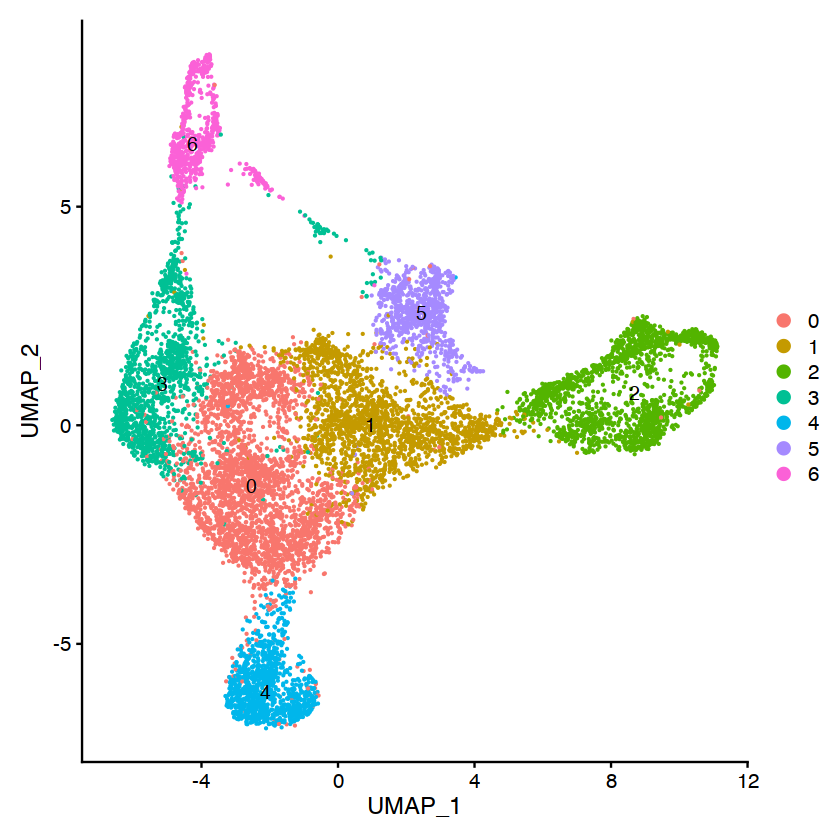

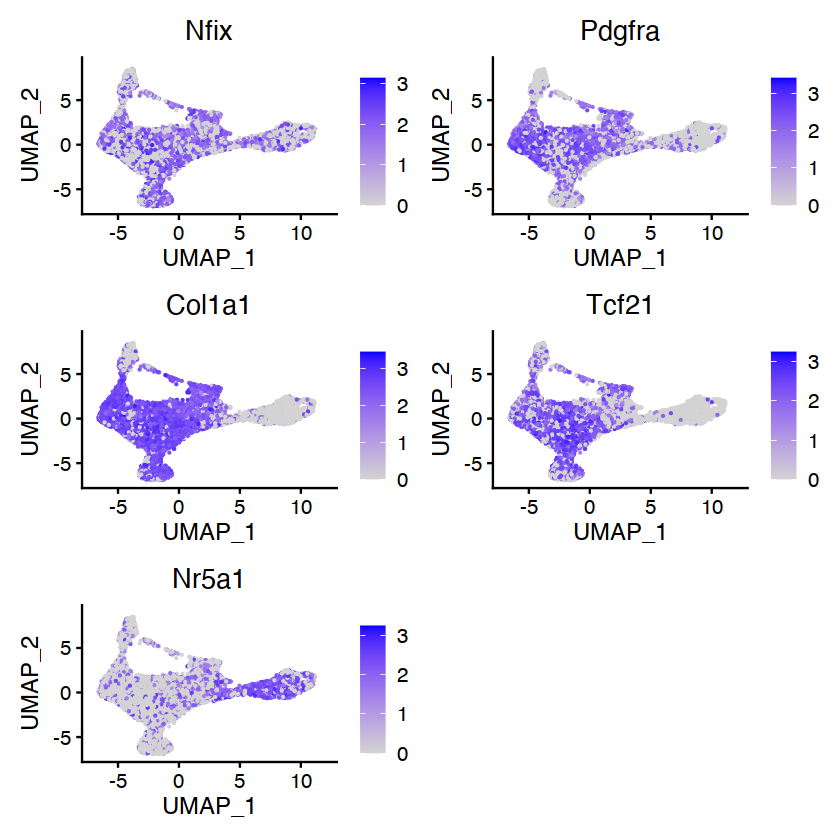

In [31]:
#Mesenchyme
DimPlot(mesenchyme, reduction = "umap", label =TRUE,raster=FALSE)
FeaturePlot(mesenchyme, features = c("Nfix","Pdgfra","Col1a1","Tcf21","Nr5a1"),raster=FALSE)

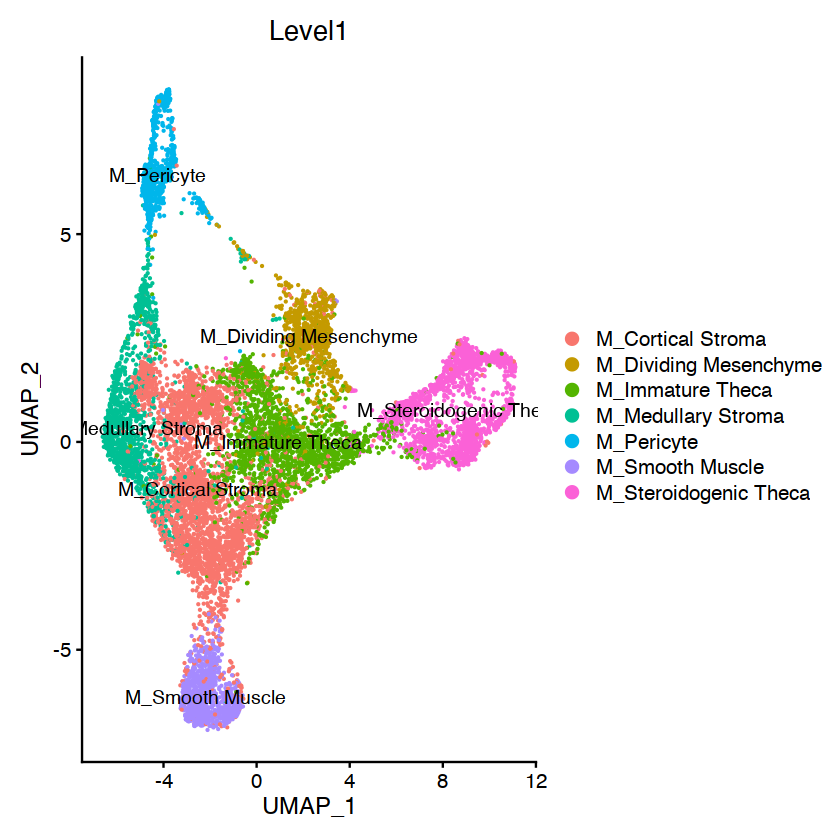

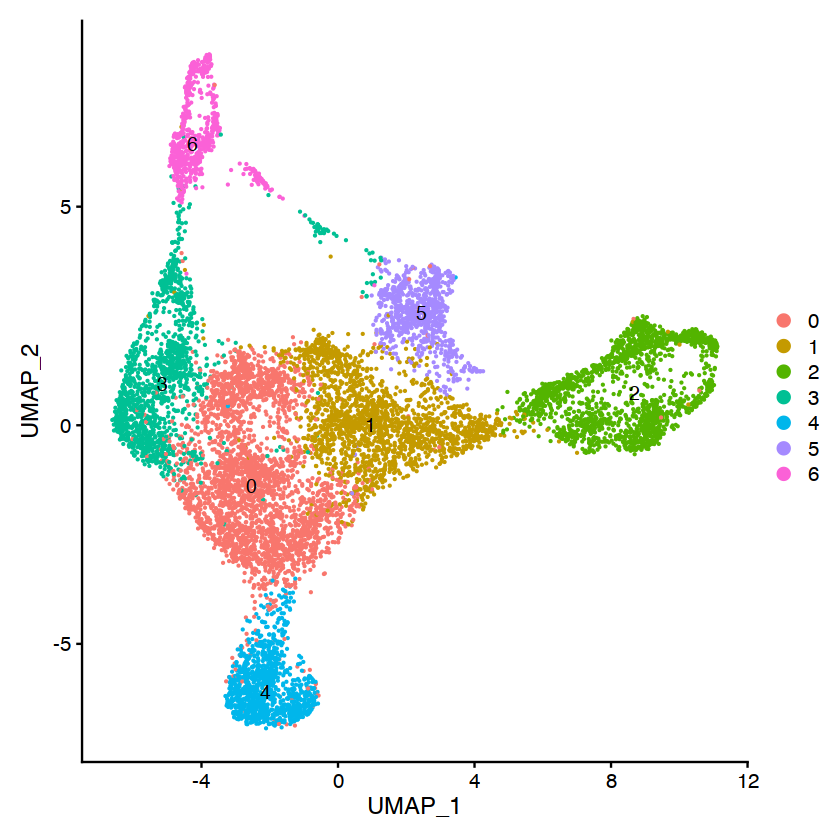

In [32]:
DimPlot(mesenchyme, reduction = "umap", group.by = "Level1", label =TRUE,raster=FALSE)
DimPlot(mesenchyme, reduction = "umap",  label =TRUE,raster=FALSE)

In [33]:
colnames(mesenchyme[[]])

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"           "nCount_RNA"       "nFeature_RNA"    
[17] "RNA_snn_res.0.3"  "seurat_clusters"

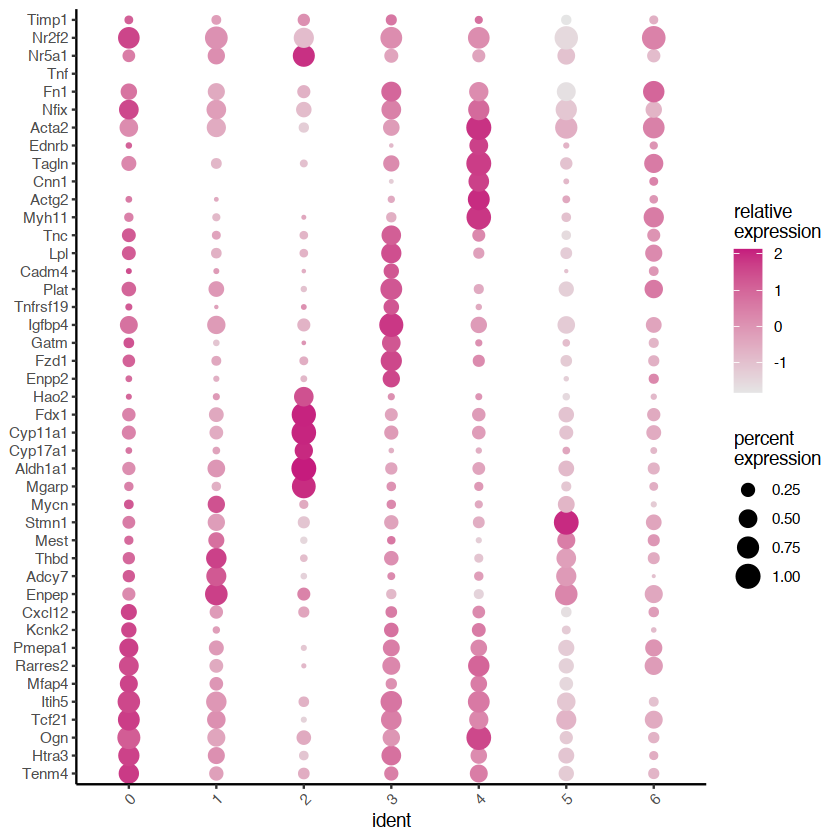

In [34]:
your_markers <- c('Tenm4','Htra3','Ogn','Tcf21','Itih5','Mfap4','Rarres2','Pmepa1','Kcnk2','Cxcl12',
                  'Enpep','Adcy7','Thbd','Mest','Stmn1','Mycn',
                  'Mgarp','Aldh1a1','Cyp17a1','Cyp11a1','Fdx1','Hao2',
                  'Enpp2','Fzd1','Gatm','Igfbp4','Tnfrsf19','Plat','Cadm4','Lpl','Tnc',
                  
                  
                  'Myh11','Actg2',"Cnn1",'Tagln','Ednrb','Acta2',
                  'Nfix','Fn1','Tnf','Nr5a1','Nr2f2','Timp1'
                  
                 )
dittoDotPlot(mesenchyme, your_markers, group.by = "ident") + coord_flip()

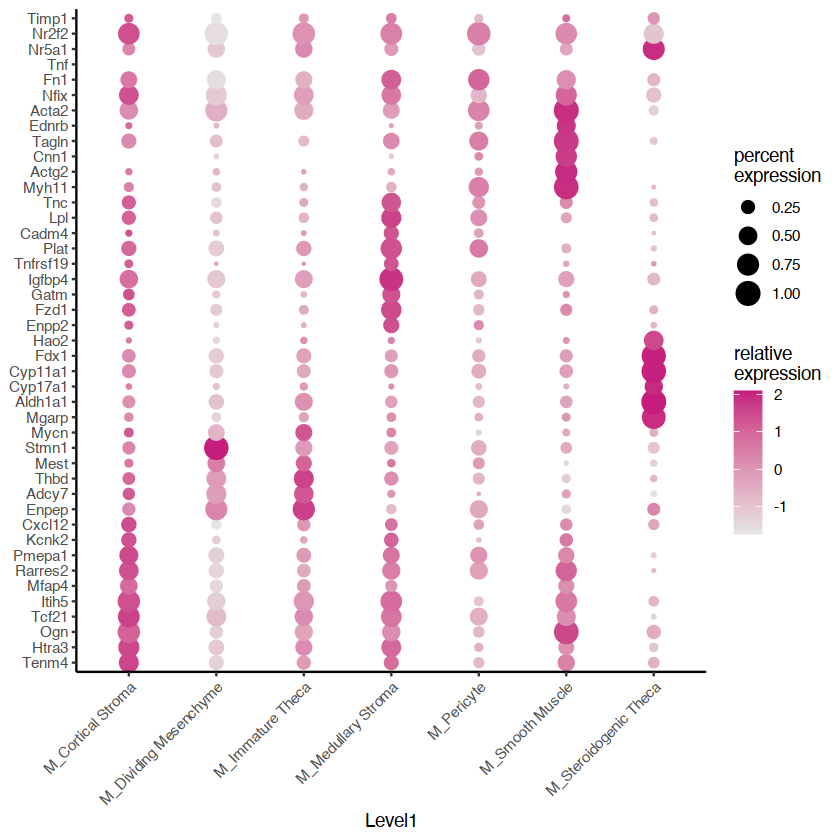

In [35]:
dittoDotPlot(mesenchyme, your_markers, group.by = "Level1") + coord_flip()

In [37]:

mesenchyme[["Louvain"]] <- Idents(object = mesenchyme)

In [38]:
mesenchyme <- RenameIdents(mesenchyme, '0' = '1.Cortical stroma', '3' = '2.Medullary stroma',
                                               '1' = '3.Immature Theca','2'='4.Steroidgenic Theca',
                                               '5'='5.Dividing mesenchyme','4' = '6.Smooth muscle',
                                               '6' = '7.Pericyte'
                          )

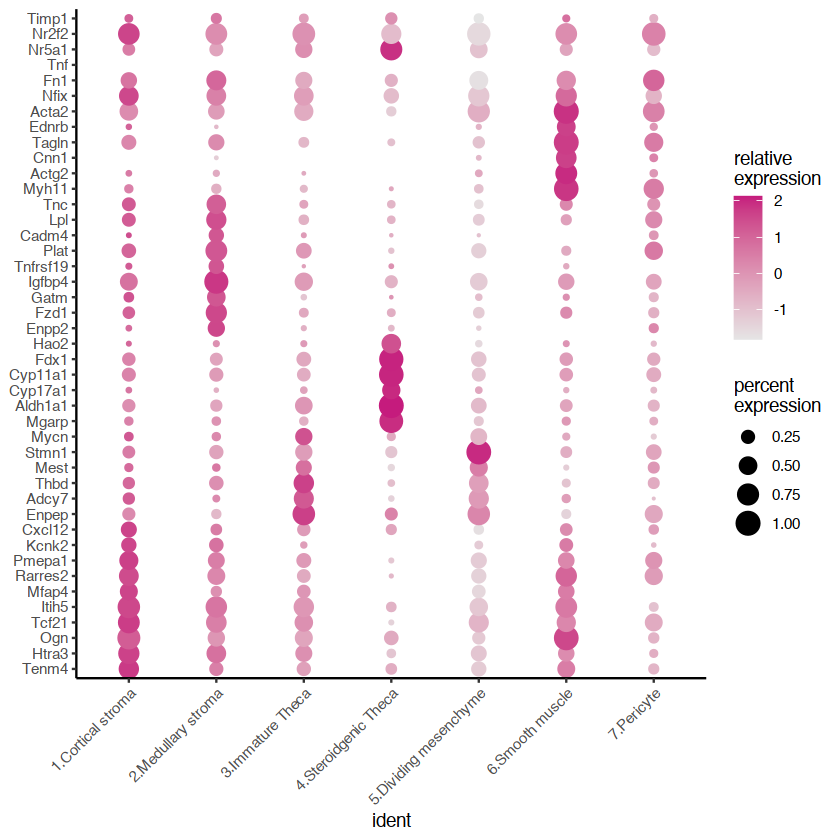

In [39]:
dittoDotPlot(mesenchyme, your_markers, group.by = "ident") + coord_flip()

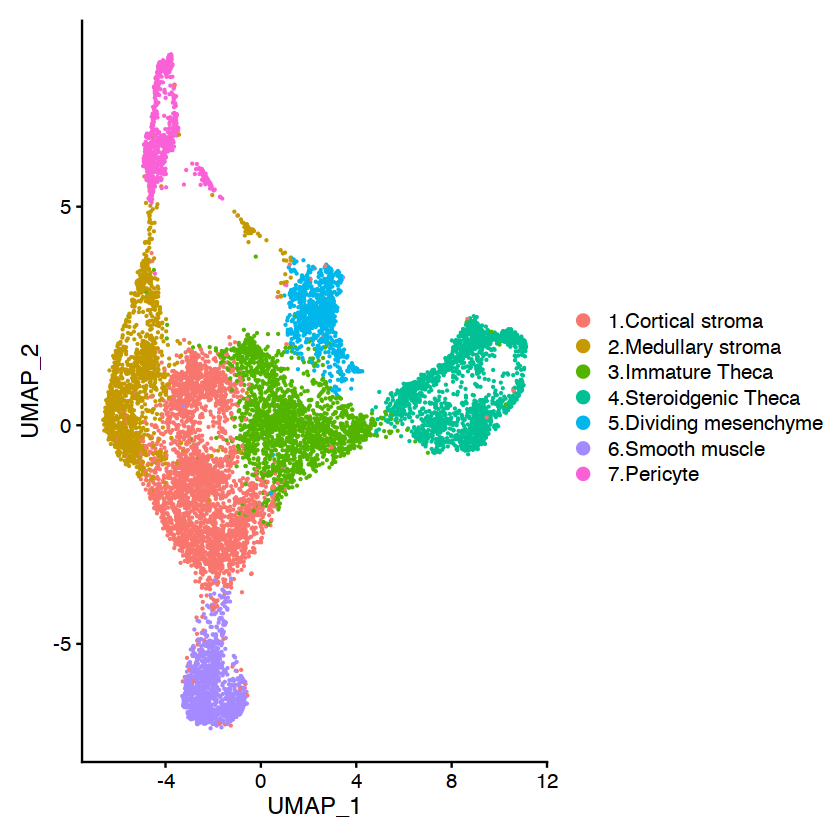

In [40]:
DimPlot(mesenchyme, reduction = "umap",raster=FALSE)

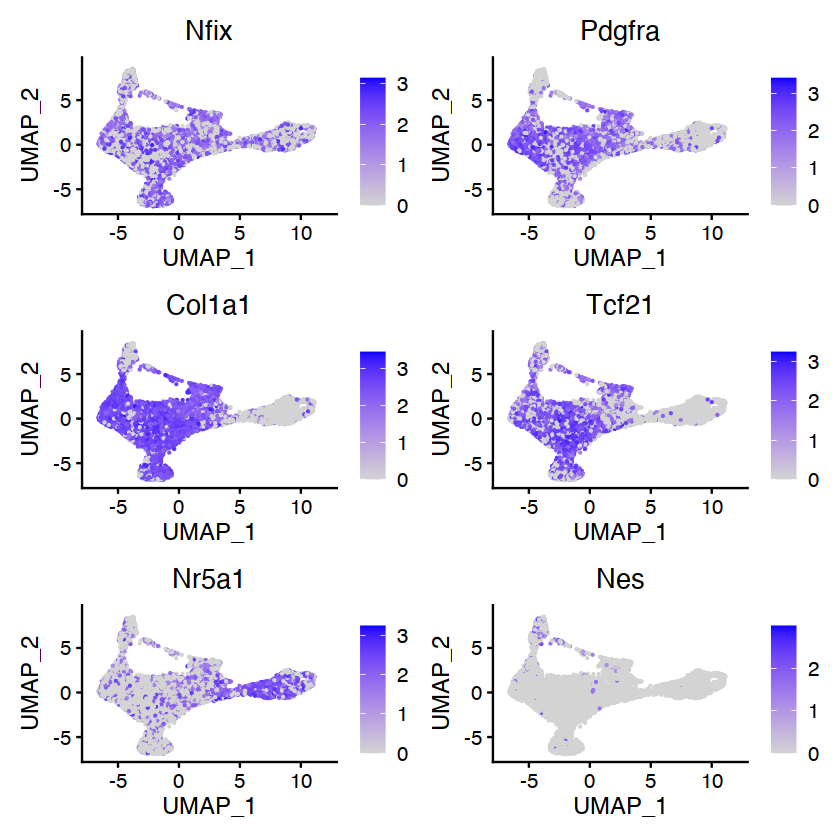

In [41]:
FeaturePlot(mesenchyme, features = c("Nfix","Pdgfra","Col1a1","Tcf21","Nr5a1","Nes"),raster=FALSE)

In [60]:
save(mesenchyme, file="data/morris-mesenchyme.Rdata")


In [1]:
load("data/morris-mesenchyme.Rdata")

In [45]:
theca_develoment =  subset(x = mesenchyme, idents = c("1.Cortical stroma","3.Immature Theca","4.Steroidgenic Theca"))

In [50]:
theca_develoment <- RenameIdents(theca_develoment,  
                                               '1.Cortical stroma' = '1.Cortical stroma',
                                               '3.Immature Theca' = '2.Immature Theca',  
                                               '4.Steroidgenic Theca'='3.Steroidgenic Theca'
                          )

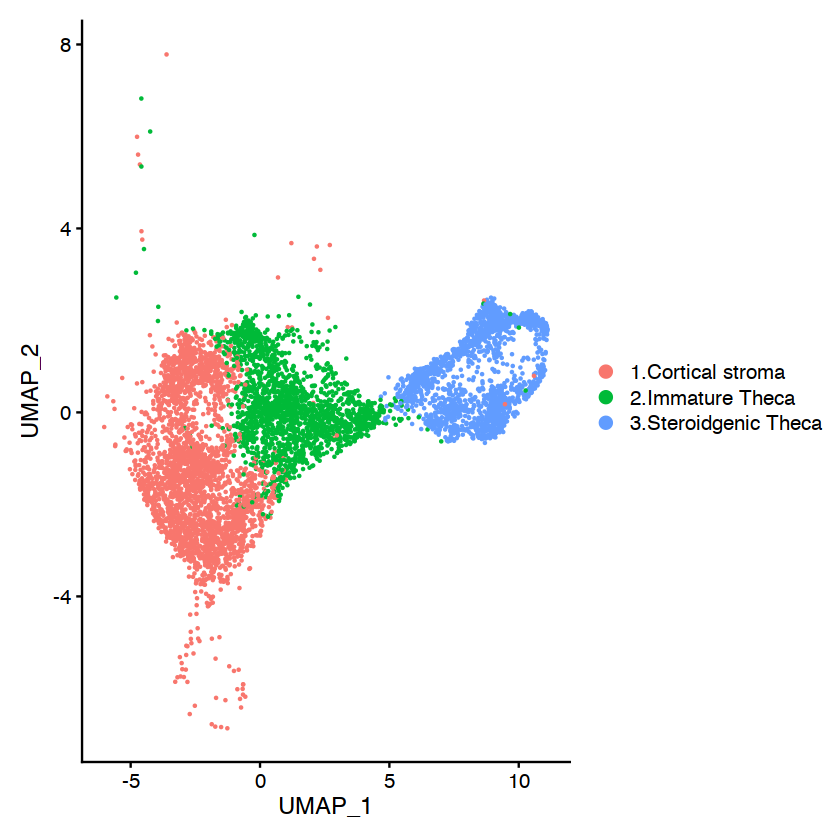

In [51]:
DimPlot(theca_develoment, reduction = "umap",raster=FALSE)

In [52]:
theca_develoment <- NormalizeData(theca_develoment, normalization.method = "LogNormalize", scale.factor = 10000)

In [53]:
theca_develoment <- ScaleData(theca_develoment)

Centering and scaling data matrix



Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 702 features requested have not been scaled (running reduction without them): E330023G01Rik, Cdh26, X4933428G20Rik, Lhfpl3, Slc22a22, Trim69, Gm12784, Gm32921, Oas1f, Serpinh1, Gm12052, A830011K09Rik, Inhbe, Diaph3, Gm12781, Gm16098, Gm45169, Slc22a14, Npy2r, A730032A03Rik, Gm4792, Sp7, Gm16596, Hapln4, Ctla4, Olfr891, Fbxw21, Alox12b, Theg, Pitpnm2os2, Nanog, Gm16087, Nutm2, Gm4208, Fev, Olfr1305, Btnl10, Kdm6bos, Zcchc13, Prss54, Aldoart2, Mettl7a2, AV039307, Olfr99, Gpr20, Gm26613, A830019P07Rik, Ces3a, Adgrg6, Bcas1os1, Olfr1275, X4933405E24Rik, Gm11867, BB557941, Gm11549, Scnn1b, Gm9932, Plg, Srrm3, Jakmip2, Slc22a26, Olfr218, Pstpip1, Thpo, Gm839, Pou4f2, Lncpint, Gm15908, Gabrp, Ccdc92, Ltc4s, Otor, Hrh3, X4930507D10Rik, Oas1g, Gpc5, Dmp1, Vmn1r51, Styxl1, Gm14325, X1700128E19Rik, Fam131c, Tceal5, Fcna, Proz, X1810059C17Rik, BC024139, Pou4f3, Gm4847, A830012C17Rik, Gm44115, Smkr.ps

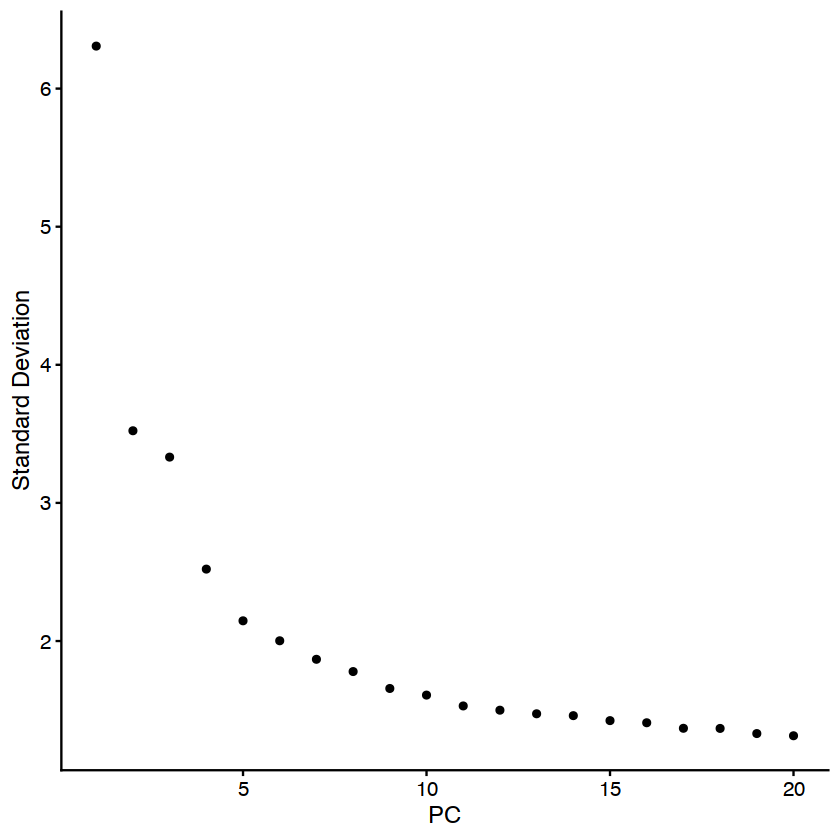

In [54]:
theca_develoment <- FindVariableFeatures(theca_develoment, selection.method = "vst", nfeatures = 2000)
theca_develoment <- RunPCA(theca_develoment, features = VariableFeatures(object = theca_develoment))
ElbowPlot(theca_develoment)

In [55]:
theca_develoment <- FindNeighbors(theca_develoment, dims = c(1:15))
theca_develoment <- FindClusters(theca_develoment, resolution = 0.3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6744
Number of edges: 229005

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8772
Number of communities: 5
Elapsed time: 0 seconds


In [56]:
# min.dist = 0.1
theca_develoment <- RunUMAP(theca_develoment, reduction = "pca", dims = c(1:15), 
  spread = 1, min.dist = 0.2)

14:10:02 UMAP embedding parameters a = 1.262 b = 1.003

14:10:02 Read 6744 rows and found 15 numeric columns

14:10:02 Using Annoy for neighbor search, n_neighbors = 30

14:10:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:10:03 Writing NN index file to temp file /var/folders/9q/bcmy70lj3f7_0km479f7zckh0000gp/T//Rtmp50Fobb/file6eb11a85579

14:10:03 Searching Annoy index using 1 thread, search_k = 3000

14:10:05 Annoy recall = 100%

14:10:05 Commencing smooth kNN distance calibration using 1 thread

14:10:07 Initializing from normalized Laplacian + noise

14:10:07 Commencing optimization for 500 epochs, with 275062 positive edges

14:10:16 Optimization finished



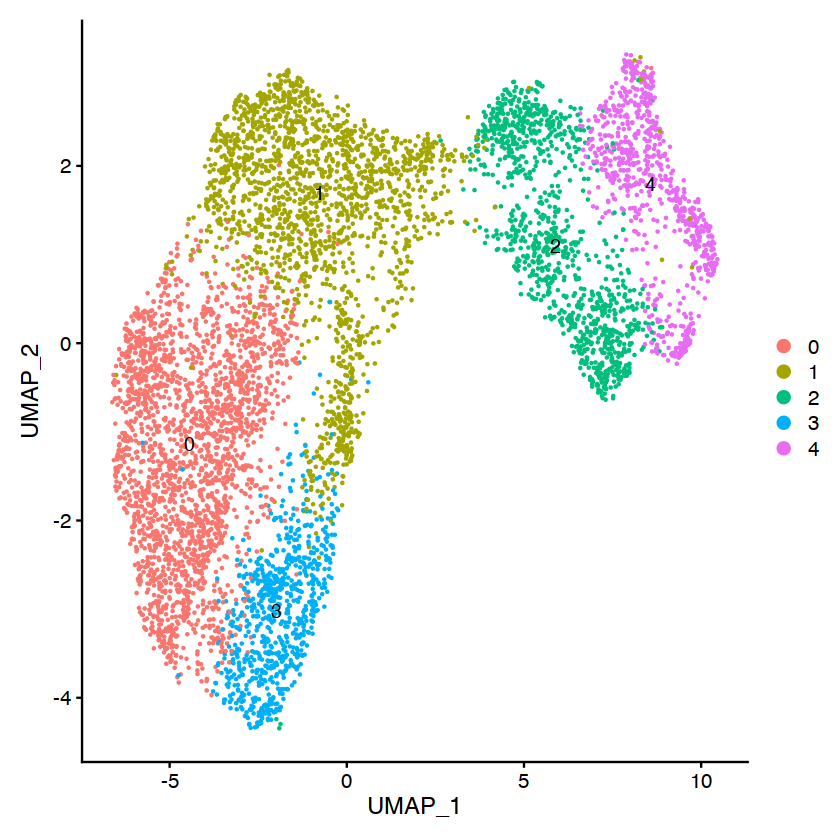

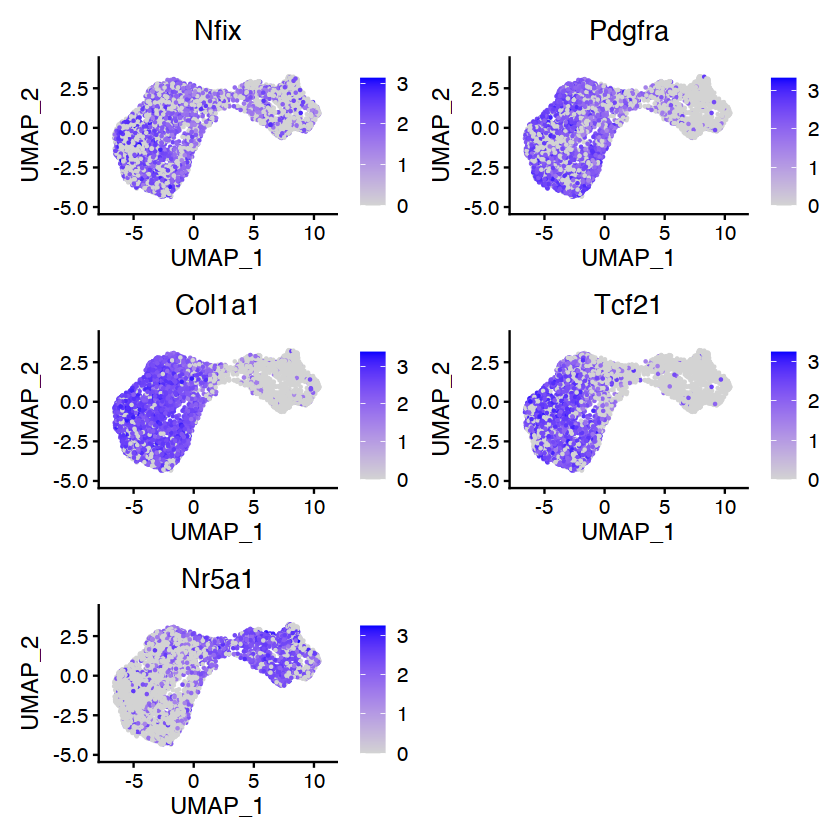

In [57]:
DimPlot(theca_develoment, reduction = "umap", label =TRUE,raster=FALSE)
FeaturePlot(theca_develoment, features = c("Nfix","Pdgfra","Col1a1","Tcf21","Nr5a1"),raster=FALSE)

In [59]:
save(theca_develoment, file="data/morris-theca_develoment.Rdata")